In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = './data/raw_data.csv'
df = pd.read_csv(path)
df.head()

,Phone_Number,Poster,No_Bedroom,No_Bathroom,No_Livingroom,Area,Apartment_Type,Project,Investor,Floor,Furniture_Type,FURNITURE,Convenient,Price,Url,Raw_Description,Entities,Location,Latitude,Longitude
0,098285***,môi giới,3.0,2.0,1.0,80.0,tập thể,NaN,NaN,3.0,NaN,"['có_điều hoà', ' nóng lạnh', ' giường', ' tủ'...",[],7.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,chính chủ cho thuê căn hộ 3 mặt thoáng tại vĩn...,"[['<unk> phúc tiện', 'LOC'], ['80', 'AREA'], [...","Vĩnh Phúc, Ba Đình, Hà Nội, Vietnam",21.041731,105.809950
1,088833***,cá nhân,2.0,1.0,NaN,48.0,chung_cư,NaN,NaN,NaN,NaN,[],"['trường', 'đại_học', 'bệnh_viện']",7.5,https://nha.chotot.com/ha-noi/quan-dong-da/thu...,"cho thuê căn hộ chung cư chính chủ, mặt đường...","[['căn_hộ chung_cư', 'APART'], ['đường phạm ng...","P.Phạm Ngọc Thạch, Đống Đa, Hà Nội, Vietnam",21.008615,105.834091
2,098441***,cá nhân,1.0,1.0,NaN,40.0,tập_thể chung_cư,NaN,NaN,NaN,NaN,[],"['ngõ rộng', 'bệnh_viện']",5.0,https://nha.chotot.com/ha-noi/quan-hai-ba-trun...,"chính chủ cho thuê căn hộ tập thể 8/3 nhà a6, ...","[['căn_hộ tập_thể', 'APART'], ['nhà a6, tầng 1...","104 A6 Phố 8/3, Quỳnh Mai, Hai Bà Trưng, Hà Nộ...",20.999548,105.860602
3,091552***,môi giới,1.0,1.0,NaN,30.0,studio,NaN,NaN,NaN,nội thất đầy đủ,"['điều_hoà', 'giường tủ', 'nóng lạnh', 'bàn bế...",['trung_tâm thương_mại'],4.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,studio 25m2 tại ngõ 118 đào tấn\nnhà full nội ...,"[['studio', 'APART'], ['25m2', 'AREA'], ['ngõ ...","Đào Tấn, Ba Đình, Hà Nội, Vietnam",21.032594,105.808742
4,091552***,môi giới,1.0,1.0,NaN,30.0,chung_cư,NaN,NaN,2.0,nội thất đầy đủ,"['điều_hoà', ' giường tủ', 'nóng lạnh', ' bàn ...","['xe để dưới hầm free', 'cổng khoá vân tay', '...",4.5,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,cho thuê căn hộ dịch vụ đủ đồ giá chỉ 4tr5 ở đ...,"[['căn_hộ dịch_vụ', 'APART'], ['45 ở đào', 'PR...","Ng. 12 Phố Đào Tấn, Cống Vị, Ba Đình, Hà Nội, ...",21.033861,105.809472


In [3]:
df.shape

(16916, 20)

In [4]:
df.rename(columns={'FURNITURE': 'Furniture'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phone_Number     16840 non-null  object 
 1   Poster           16916 non-null  object 
 2   No_Bedroom       16764 non-null  float64
 3   No_Bathroom      10843 non-null  float64
 4   No_Livingroom    3945 non-null   float64
 5   Area             16916 non-null  object 
 6   Apartment_Type   12151 non-null  object 
 7   Project          12650 non-null  object 
 8   Investor         0 non-null      float64
 9   Floor            5596 non-null   float64
 10  Furniture_Type   10944 non-null  object 
 11  Furniture        16916 non-null  object 
 12  Convenient       16916 non-null  object 
 13  Price            16740 non-null  object 
 14  Url              16916 non-null  object 
 15  Raw_Description  16684 non-null  object 
 16  Entities         16916 non-null  object 
 17  Location    

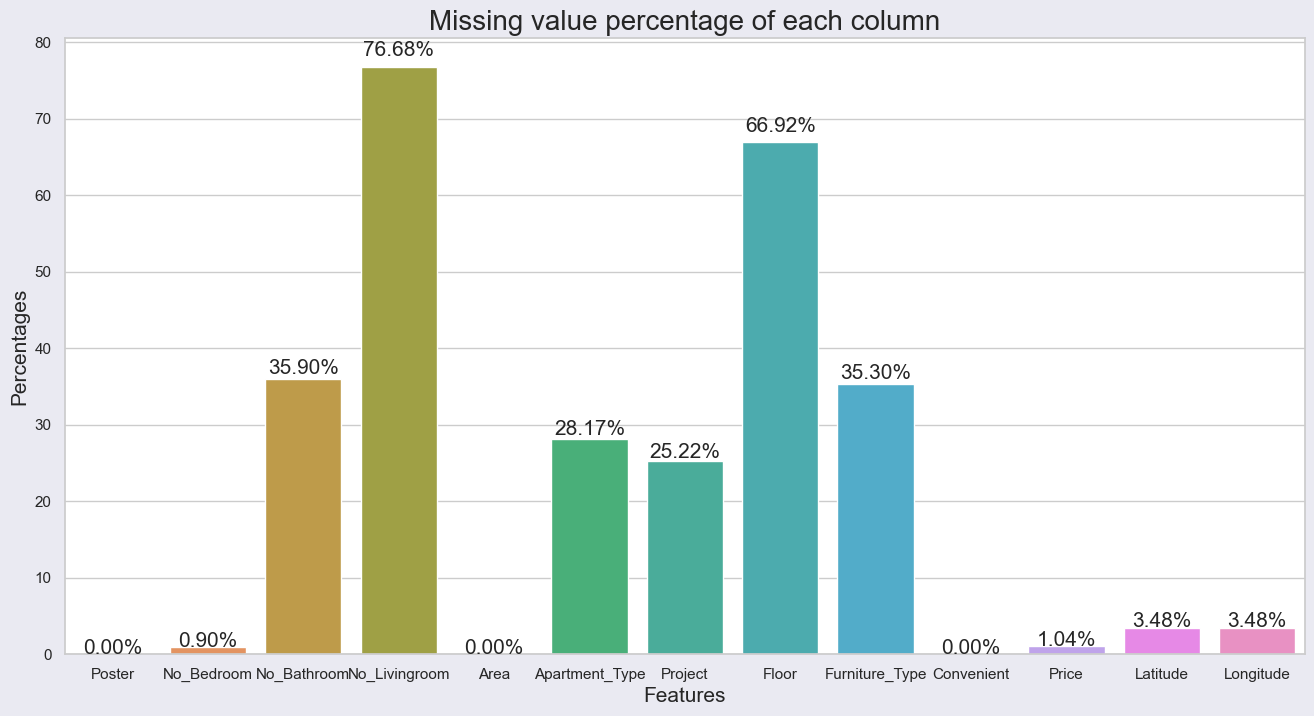

In [6]:
# visualize percentage of missing value
def missing_percent(df):
    nan_percent= 100 * (df.isnull().sum()/len(df))
    # nan_percent= nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['Investor', 'Phone_Number', 'Raw_Description', 'Location', 'Furniture', 'Convinient', 'Entities', 'Url']:
    bar_x.append(x[0])
    bar_y.append(x[1])

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Missing value percentage of each column', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

## Furniture feature

In each feature, I will visualize to get insight of the feature, then take account into some processes to clean data, handle missing value, instead of split project into separate steps such as: EDA, Data Preprocess,...

In [7]:
df['Furniture_Type'].isnull().sum()

5972

Text(0, 0.5, 'Furniture_Type')

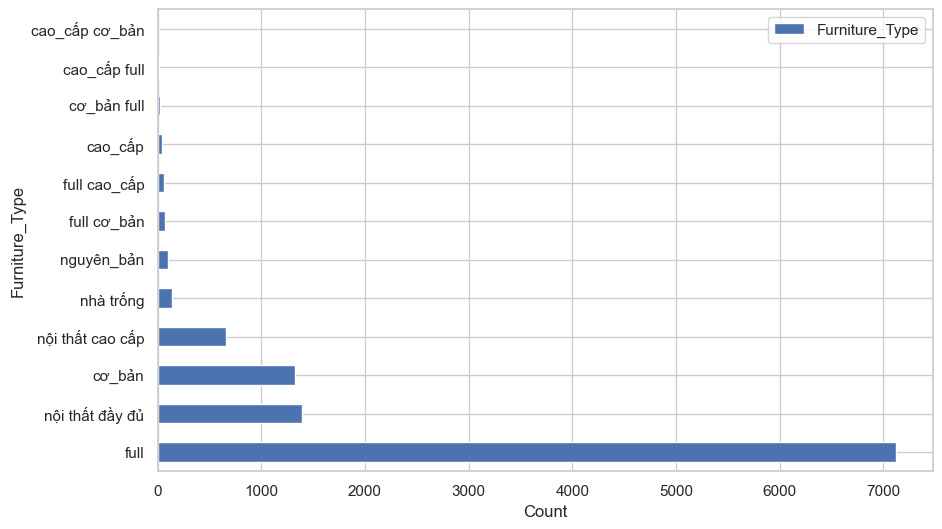

In [8]:
df['Furniture_Type'].value_counts().to_frame().plot.barh(figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Furniture_Type')

# cao_cấp cơ_bản == basic luxury
# cao_cấp full == full luxury
# cơ_bản full == full basic
# cao_cấp == luxury
# full cao_cấp == cao_cấp full == full luxury
# full cơ_bản == cơ_bản full == full basic
# nguyên_bản == origin
# nhà trống == empty
# nội thất cao cấp == luxury
# cơ_bản == basic
# nội thất đầy đủ  == full
# Some duplicate furniture type in the dataset i.e. full cao_cấp == cao_cấp full, full cơ_bản == cơ_bản full, ...

In [9]:
# normalize furniture type into consistent list
for i in range(df.shape[0]):
  temp = str(df.iloc[i]['Furniture_Type'])
  if temp == 'cơ_bản' or temp == 'cơ bản' or temp == 'full cơ_bản' or temp == 'full cơ bản' or temp == 'cơ_bản full':
      df['Furniture_Type'][i] = 'cơ bản'
  if temp == 'nhà trống':
      df['Furniture_Type'][i] = 'nguyên bản'
  if temp == 'nguyên_bản' or temp == 'nguyên bản':
      df['Furniture_Type'][i] = 'nguyên bản'
  if temp == 'nội thất cao cấp' or temp == 'full cao_cấp' or temp == 'cao_cấp' or temp == 'cao_cấp full' or temp == 'cao_cấp cơ_bản':
      df['Furniture_Type'][i] = 'full cao cấp'
  if temp == 'nội thất đầy đủ':
      df['Furniture_Type'][i] = 'full'

In [10]:
# raw description contains a lot of information. So, we can extract some information about furniture type from them
for i in range(df.shape[0]):
  if isinstance(df.iloc[i]['Furniture_Type'], float):
    temp = str(df.iloc[i]['Entities']) + str(df.iloc[i]['Raw_Description']) + str(df.iloc[i]['Project'])
    if 'cơ_bản' in temp or 'cơ bản' in temp or 'full cơ_bản' in temp or 'full cơ bản' in temp or 'cơ_bản full' in temp:
        df['Furniture_Type'][i] = 'cơ bản'
    elif 'nhà trống' in temp:
        df['Furniture_Type'][i] = 'nguyên bản'
    elif 'nguyên_bản' in temp or 'nguyên bản' in temp:
        df['Furniture_Type'][i] = 'nguyên bản'
    elif 'nội thất cao cấp' in temp  or 'full cao_cấp' in temp or 'cao_cấp' in temp or 'cao_cấp full' in temp or 'cao_cấp cơ_bản' in temp:
        df['Furniture_Type'][i] = 'full cao cấp'
    elif 'nội thất đầy đủ' in temp:
        df['Furniture_Type'][i] = 'full'

In [11]:
# fill missing value by "unk" value
df['Furniture_Type'].fillna('unk', inplace=True)

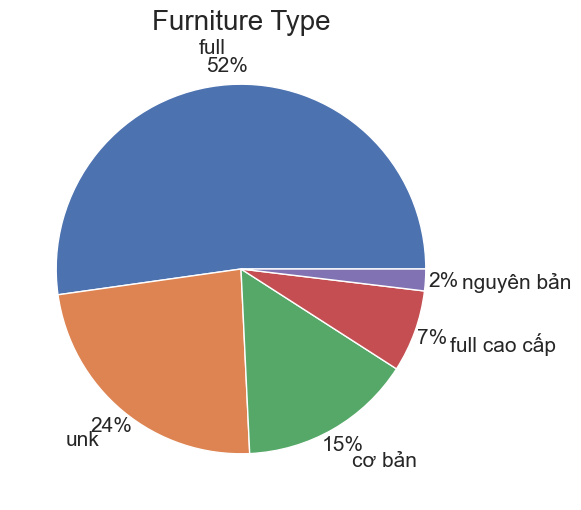

In [12]:
plt.subplots(figsize=(10,6))
df['Furniture_Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, fontsize=15)
plt.axis('off')
plt.title('Furniture Type', fontsize=20)
plt.show()

## Area and Price Feature

In [13]:
# unit of price: million vietnamdong
# unit or area: square meter
# there are some text values in area and price feature
# so, need to process to extract number from the text values

import string
punc = list(string.punctuation.replace(',','').replace('.','') + 'abcdefghyklmnopqrstuvwxyz')
for i in range(df.shape[0]):
    if any(p in str(df['Area'][i]) for p in punc):
        print(df['Area'][i])
        #drop wrong label
        df['Area'] = df['Area'].drop(index=i)
for i in range(df.shape[0]):
    if any(p in str(df['Price'][i]) for p in punc):
        print(df['Price'][i])

05/12/20
05/12/20
05/12/20
30/11/20
05/12/20
04/12/20
30/11/20
04/12/20
03/12/20
03/12/20
30/11/20
03/12/20
03/12/20
03/12/20
29/11/20
29/11/20
nan
['8,5 triệuthá', 'PRICE']
nan
['7,5 triệu', 'PRICE']
nan
nan
['9xx/ngày', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/tháng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
['8 triệu đến 16 triệu/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
nan
nan
['17 ~ triệ', 'PRICE']
nan
['4tr5 đến 6tr', 'PRICE']
['5 - 12 triệu/', 'PRICE']
nan
['15 triệu/tháng', 'PRICE']
['9 triệu/tháng.', 'PRICE']
nan
['5.5 triệu/thá', 'PRICE']
['8.25 k/m2/', 'PRICE']
['2.5 tr - 4.5 tr/tháng', 'PRICE']
['2.5 tr - 4.5 tr/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
['8 triệu đến 16 triệu/th', 'PRICE']
['2.5 tr - 4.5 tr/thá', 'PRICE']
nan
nan
nan
['17 ~ triệ', 'PRICE']
nan
['4tr5 đến 6tr', 'PRICE']
['5 - 12 triệu/', 'PRICE']
nan
['15 triệu/tháng', 'PRICE']
['9 triệu/tháng.', 'PRICE']
nan
['5.5 triệu/thá', 'PRICE']
['6,5 t

In [14]:
import re
def convert_obj_to_float(df, field):
    form = "[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?"
    for i in range(df.shape[0]):
        if isinstance(df[field][i], str):
            temp = re.findall(form, df[field][i].replace(',','.').replace('m2','').replace(' tr ','.').replace('tr','.').replace('00.000','.'))
            if not len(temp):
                df[field] = df[field].drop(index=i)
            else:
                temp_ = 0.0
                for t in temp:
                    temp_ += float(t[0])
                df[field][i] = temp_/len(temp)
        if isinstance(df[field][i], int):
            df[field][i] = float(df[field][i])
    df[field] = df[field].astype('float')
convert_obj_to_float(df, 'Price')
convert_obj_to_float(df, 'Area')

In [15]:
df['Price'].isnull().sum()

192

In [16]:
df['Area'].isnull().sum()

16

In [17]:
df[['Price', 'Area']].describe()

,Price,Area
count,16724.000000,16900.000000
mean,58.358730,74.482237
std,6226.249488,33.162276
min,0.625000,1.000000
25%,6.500000,50.000000
50%,9.000000,72.000000
75%,12.000000,93.000000
max,805194.333333,826.000000


In [18]:
df['Price'].describe()

count     16724.000000
mean         58.358730
std        6226.249488
min           0.625000
25%           6.500000
50%           9.000000
75%          12.000000
max      805194.333333
Name: Price, dtype: float64

Text(0.5, 1.0, 'Box plot of price')

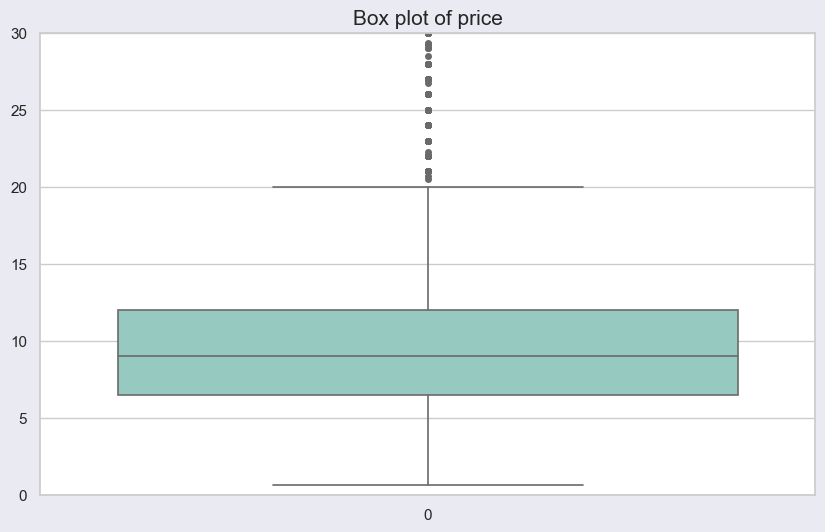

In [19]:
# visualize boxplot of price
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

ax = sns.boxplot(data=df['Price'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 30))
ax.set_title('Box plot of price', fontsize=15)

In [20]:
df.query('Price >= 20')

,Phone_Number,Poster,No_Bedroom,No_Bathroom,No_Livingroom,Area,Apartment_Type,Project,Investor,Floor,Furniture_Type,Furniture,Convenient,Price,Url,Raw_Description,Entities,Location,Latitude,Longitude
9,090455***,môi giới,3.0,2.0,NaN,118.0,chung cư,vinhomes times city - park hill premium,NaN,NaN,full,[],[],21.0,https://nha.chotot.com/ha-noi/quan-hai-ba-trun...,tôi cần cho thuê gấp căn hộ 03 phòng ngủ tòa p...,"[['03 phòng ngủ', 'ROOM'], ['times', 'PJ'], ['...","458, 458 P. Minh Khai, Vĩnh Tuy, Hai Bà Trưng,...",20.997276,105.867104
196,052298***,cá nhân,3.0,2.0,NaN,136.0,chung cư,king palace 108 nguyễn trãi,NaN,8.0,full cao cấp,[],"['thang_máy', 'an_ninh tốt', 'bảo_vệ 24/24', '...",23.0,https://nha.chotot.com/ha-noi/quan-thanh-xuan/...,chính chủ cho thuê căn hộ full nội thất vào ở ...,"[['full', 'FUR-TYPE'], ['king palace', 'PJ'], ...","108 Đ. Nguyễn Trãi, Nhân Chính, Thanh Xuân, Hà...",20.999558,105.814575
221,035442***,môi giới,2.0,2.0,NaN,74.0,chung cư,vinhomes metropolis,NaN,NaN,full,[],['slot xe ôtô'],22.0,https://nha.chotot.com/ha-noi/quan-ba-dinh/thu...,🌼🌼🌼 cho thuê căn hộ 2 ngủ giá 22tr/ tháng có s...,"[['2 ngủ', 'ROOM'], ['22 trtháng', 'PRICE'], [...","số 29, số, 29 P. Liễu Giai, Ngọc Khánh, Ba Đìn...",21.032055,105.814083
319,083868***,môi giới,3.0,2.0,NaN,115.0,chung_cư,king palace 108 nguyễn trãi,NaN,NaN,full cao cấp,[],[],20.0,https://nha.chotot.com/ha-noi/quan-thanh-xuan/...,cho thuê căn hộ chung cư cao cấp tiêu chuẩn 5 ...,"[['căn_hộ chung_cư', 'APART'], ['king palace',...","Thượng Đình, Thanh Xuân, Hanoi, Vietnam",20.999773,105.814532
343,032616***,cá nhân,3.0,3.0,NaN,220.0,chung_cư,vincom center bà triệu,NaN,10.0,full,[],[],46.0,https://nha.chotot.com/ha-noi/quan-hai-ba-trun...,"chính chủ cho thuê 2 căn hộ đập thông , nhà sử...","[['căn_hộ', 'APART'], ['full đồ', 'FUR-TYPE'],...","191, 191 Bà Triệu, Lê Đại Hành, Hai Bà Trưng, ...",21.011068,105.849483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16697,0982100***,môi giới,3.0,NaN,NaN,130.0,cao_cấp chung_cư,căn hộ chung cư the lancaster núi trúc,NaN,15.0,full cao cấp,"['điều_hoà', 'máy_giặt', 'tủ', 'cây_nước nóng ...","['sảnh lễ_tân', 'bể_bơi', 'an_ninh', 'khu thươ...",25.0,https://alonhadat.com.vn/can-cho-thue-can-ho-c...,bql cần cho thuê căn hộ cao cấp tại tòa the la...,"[['căn_hộ cao_cấp', 'APART'], ['the lancaster'...","Phố Núi Trúc, Giảng Võ, Ba Đình, Hà Nội, Vietnam",21.030065,105.822659
16808,0919991***,môi giới,2.0,NaN,NaN,115.0,chung_cư,mandrin garden,NaN,NaN,full,"['sofa', ' tivi', ' tủ_lạnh', ' máy_giặt', ' g...",[],23.0,https://alonhadat.com.vn/cho-thue-can-ho-d2-gi...,cho thuê căn hộ mandrin garden diện tích 115m2...,"[['<s>', 'FUR-TYPE'], ['căn_hộ', 'APART'], ['m...","Hoàng Minh Giám, Trung Hoà, Cầu Giấy, Hà Nội, ...",21.004945,105.798086
16814,0355638***,môi giới,3.0,2.0,NaN,130.0,cao_cấp chung_cư,căn hộ chung cư the legacy,NaN,16.0,full,[],"['đủ các tiện_ích cao_cấp â', 'giao_thông thôn...",25.0,https://alonhadat.com.vn/cho-thue-can-ho-cao-c...,"chung cư cao cấp the legacy lê văn thiêm, than...","[['chung_cư cao_cấp', 'APART'], ['the legacy',...","P.Ngụy Như Kon Tum, Thanh Xuân Trung, Thanh Xu...",21.000560,105.802918
16832,0937682***,môi giới,3.0,NaN,NaN,130.0,NaN,nhà phố grandeur palace 138b giảng võ,NaN,25.0,full,[],[],40.0,https://alonhadat.com.vn/cho-thue-can-ho-grand...,"cho thuê căn hộ grandeur palace giảng võ , ba ...","[['grandeur palace', 'PJ'], ['giảng võ, ba_đìn...","Giang Vo, Ba Đình, Hanoi, Vietnam",21.027061,105.819490


Text(0.5, 1.0, 'Box plot of Area')

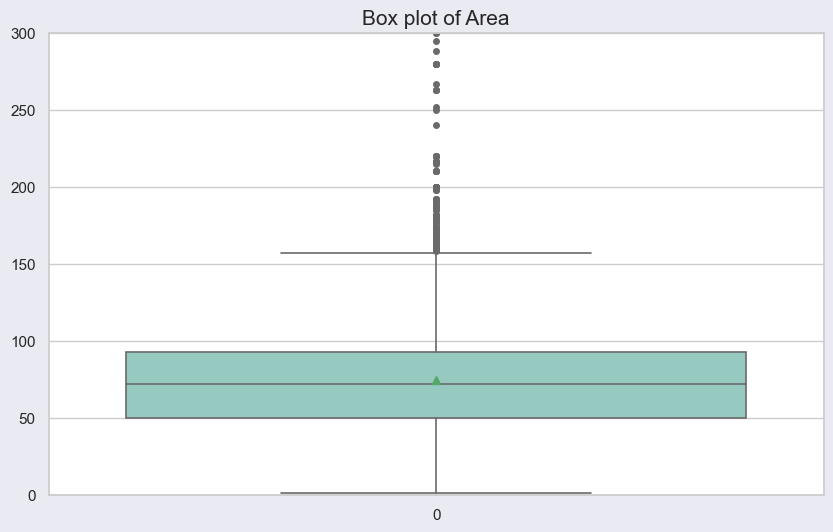

In [21]:
#  visualize boxplot of area feature
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

ax = sns.boxplot(data=df['Area'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 300))
ax.set_title('Box plot of Area', fontsize=15)

In [22]:
df.query('Area > 160')

,Phone_Number,Poster,No_Bedroom,No_Bathroom,No_Livingroom,Area,Apartment_Type,Project,Investor,Floor,Furniture_Type,Furniture,Convenient,Price,Url,Raw_Description,Entities,Location,Latitude,Longitude
169,036789***,môi giới,4.0,3.0,NaN,182.0,chung_cư cao_cấp,dolphin plaza trần bình,NaN,NaN,full,[],[],14.0,https://nha.chotot.com/ha-noi/quan-nam-tu-liem...,cho thuê căn hộ cao cấp\ndolphin plaza trần bì...,"[['căn_hộ cao_cấp', 'APART'], ['dolphin plaza ...","Dolphin Plaza, 28 Trần Bình, Mỹ Đình, Nam Từ L...",21.030229,105.776573
343,032616***,cá nhân,3.0,3.0,NaN,220.0,chung_cư,vincom center bà triệu,NaN,10.0,full,[],[],46.0,https://nha.chotot.com/ha-noi/quan-hai-ba-trun...,"chính chủ cho thuê 2 căn hộ đập thông , nhà sử...","[['căn_hộ', 'APART'], ['full đồ', 'FUR-TYPE'],...","191, 191 Bà Triệu, Lê Đại Hành, Hai Bà Trưng, ...",21.011068,105.849483
372,036789***,môi giới,4.0,3.0,NaN,192.0,chung_cư,dolphin plaza,NaN,NaN,full,[],[],17.0,https://nha.chotot.com/ha-noi/quan-nam-tu-liem...,cho thuê căn hộ cao cấp .\ndolphin plaza số 6 ...,"[['căn_hộ', 'APART'], ['dolphin plaza', 'PJ'],...","Dolphin Plaza, 28 Trần Bình, Mỹ Đình, Nam Từ L...",21.030229,105.776573
447,093396***,cá nhân,5.0,4.0,NaN,295.0,penthouse,udic westlake tây hồ,NaN,NaN,full cao cấp,"['bếp', ' hút mùi', ' kệ', ' nóng lạnh', ' điề...",[],48.0,https://nha.chotot.com/ha-noi/quan-tay-ho/thue...,chính chủ cần cho thuê căn penhouse tòa udic d...,"[['căn penhouse toà udic', 'PJ'], ['295 m', 'A...","Võ Chí Công, Phú Thượng, Tây Hồ, Hà Nội, Vietnam",21.085260,105.816961
558,093333***,môi giới,2.0,1.0,1.0,445.0,mini chung_cư,NaN,NaN,NaN,unk,"['kệ bế', 'tủ bếp', 'nóng lạnh']",['cầu_thang_máy ô_tô'],5.0,https://nha.chotot.com/ha-noi/quan-cau-giay/th...,"cho thuê căn hộ chung cư mini 8 tầng, 85 xuân ...","[['căn_hộ chung_cư mini', 'APART'], ['85 xuân ...","Xuân Thủy & Đường Hồ Tùng Mậu, Mai Dịch, Cầu G...",21.036819,105.780847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16502,0963018***,môi giới,3.0,3.0,NaN,180.0,NaN,căn hộ chung cư hei tower,NaN,21.0,full,"['điều_hoà', 'hệ_thống chiếu sángnóng lạnh']","['giao_thông thuận_tiện tuyến phố chính', 'quá...",17.0,https://alonhadat.com.vn/cho-thue-can-ho-180m2...,"cho thuê căn hộ tại heitower, số 1 ngụy như ko...","[['heitower', 'LOC'], ['số 1 nguỵ như kon_tum'...","1 P.Ngụy Như Kon Tum, Nhân Chính, Thanh Xuân, ...",21.003035,105.805445
16538,0989695***,môi giới,4.0,NaN,NaN,177.0,NaN,căn hộ chung cư star lake,NaN,NaN,unk,[],[],48.0,https://alonhadat.com.vn/cho-thue-can-ho-chung...,NaN,[],"Đ. Nguyễn Văn Huyên, Xuân La, Tây Hồ, Hà Nội, ...",21.057969,105.797542
16587,0359724***,môi giới,4.0,NaN,NaN,210.0,NaN,căn hộ chung cư discovery complex,NaN,12.0,full,"['tivi', ' tủ_lạnh', ' máy_giặt', ' giường tủ'...",[],20.0,https://alonhadat.com.vn/chinh-chu-cho-thue-cc...,"chính chủ cho thuê cc tòa discovery complex, 2...","[['cc', 'APART'], ['toà discovery complex', 'P...","Đ. Cầu Giấy, Cầu Giấy, Hà Nội, Vietnam",21.033392,105.797774
16619,0889552***,môi giới,4.0,NaN,NaN,198.0,NaN,căn hộ chung cư dolphin plaza,NaN,20.0,unk,[],[],18.0,https://alonhadat.com.vn/cho-thue-can-4pn-full...,NaN,[],"Trần Bình, Hà Nội, Vietnam",21.033102,105.778822


## Apartment_Type Feature

Text(0, 0.5, 'Apartment_Type')

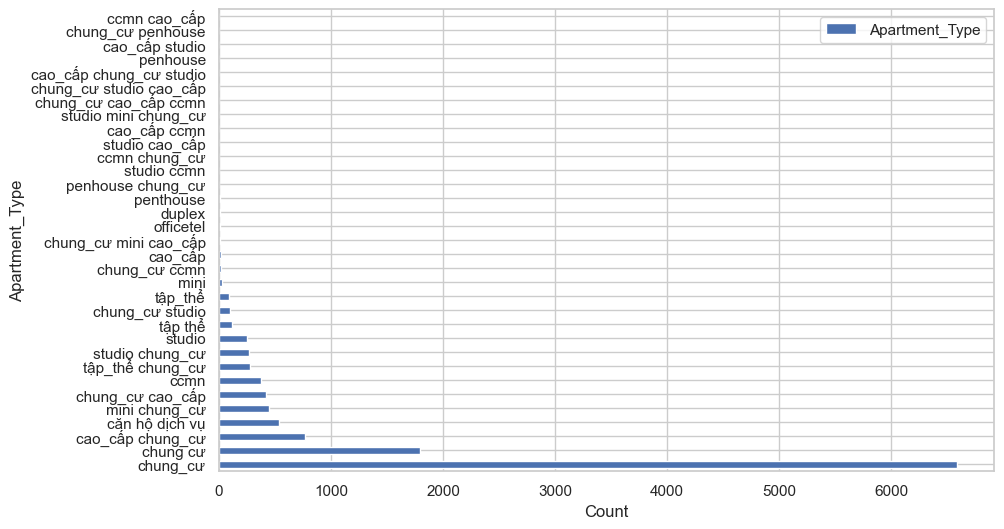

In [23]:
df['Apartment_Type'].value_counts().to_frame().plot.barh(figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Apartment_Type')

# Some duplicate apartment type in the dataset

In [24]:
print(df['Apartment_Type'].unique())

['tập thể' 'chung_cư' 'tập_thể chung_cư' 'studio' 'ccmn' 'căn hộ dịch vụ'
 'mini chung_cư' 'chung cư' 'studio chung_cư' 'chung_cư cao_cấp'
 'chung_cư studio cao_cấp' 'mini' 'penthouse' 'chung_cư ccmn' 'duplex'
 'studio mini chung_cư' nan 'tập_thể' 'cao_cấp' 'penhouse chung_cư'
 'chung_cư mini cao_cấp' 'cao_cấp chung_cư' 'officetel' 'cao_cấp ccmn'
 'studio cao_cấp' 'studio ccmn' 'chung_cư cao_cấp ccmn' 'chung_cư studio'
 'cao_cấp chung_cư studio' 'penhouse' 'cao_cấp studio' 'ccmn chung_cư'
 'chung_cư penhouse' 'ccmn cao_cấp']


In [25]:
# normalize apartment type into consistent list
# chung cư cao cấp == luxury apartment
# chung cư studio == studio apartment
# chung cư mini == mini apartment
# chung cư tập thể == collective apartment
# chung cư thường == normal apartment
for i in range(df.shape[0]):
    if 'duplex' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư cao cấp'
    elif 'officetel' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư cao cấp'
    elif 'studio' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư studio'
    elif 'penhouse' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư cao cấp'
    elif 'mini' in str(df['Apartment_Type'][i]) or 'ccmn' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư mini'
    elif 'tập_thể' in str(df['Apartment_Type'][i]) or 'tập thể' in str(df['Apartment_Type'][i]):
        df['Apartment_Type'][i] = 'chung cư tập thể'
    else:
        df['Apartment_Type'][i] = 'chung cư thường'

In [26]:
df['Apartment_Type'].value_counts()

chung cư thường     14887
chung cư mini         891
chung cư studio       625
chung cư tập thể      488
chung cư cao cấp       25
Name: Apartment_Type, dtype: int64

In [27]:
df['Apartment_Type'].isna().sum()

0

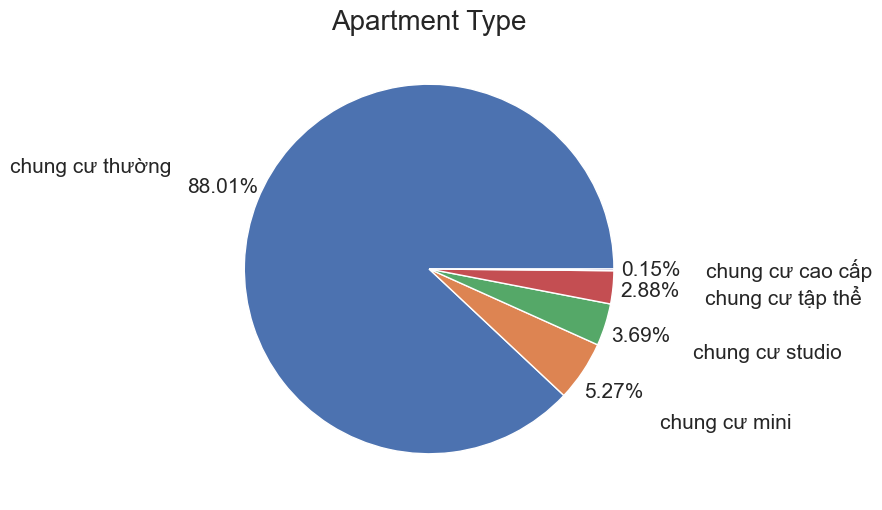

In [28]:
plt.subplots(figsize=(10,6))
df['Apartment_Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.5, fontsize=15)
plt.axis('off')
plt.title('Apartment Type', fontsize=20)
plt.show()

## No Room Feature

In [29]:
print(df['No_Bedroom'].isnull().sum())

print(df['No_Bathroom'].isnull().sum())

print(df['No_Livingroom'].isnull().sum())

152
6073
12971


Text(0.5, 1.0, 'Box plot of bedroom number')

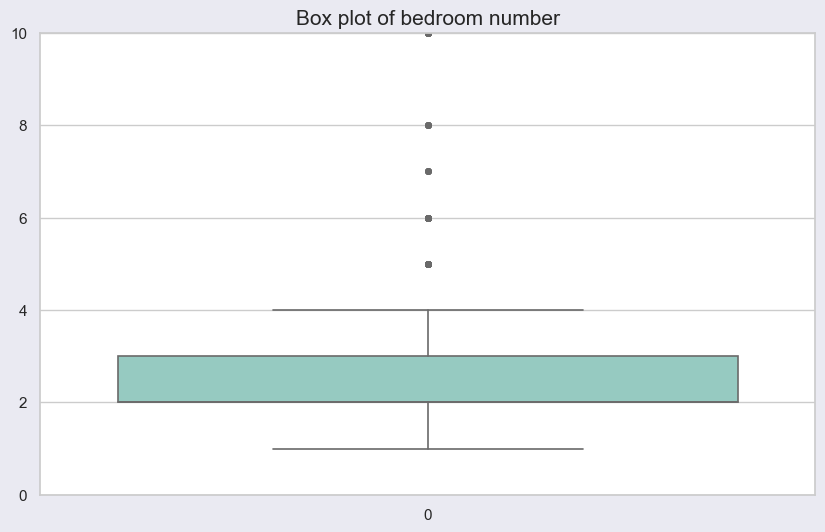

In [30]:
#  visualize boxplot of no bedroom
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

# print(df['PRICE'].sort_values(ascending=False))

ax = sns.boxplot(data=df['No_Bedroom'],
                 palette='Set3',
                 linewidth=1.2,
                 fliersize=2,
                 showmeans=True,
                 flierprops=dict(marker='o', markersize=4))
ax.set(ylim=(0, 10))
ax.set_title('Box plot of bedroom number', fontsize=15)

In [31]:
df.query('No_Bedroom > 4')

,Phone_Number,Poster,No_Bedroom,No_Bathroom,No_Livingroom,Area,Apartment_Type,Project,Investor,Floor,Furniture_Type,Furniture,Convenient,Price,Url,Raw_Description,Entities,Location,Latitude,Longitude
127,085389***,cá nhân,5.0,5.0,NaN,30.0,chung cư mini,NaN,NaN,NaN,full,"['sàn gỗgiường', ' tủhoà', 'nóng lạnh', 'modem...","['để xe', 'quán ă', 'chợ']",3.8,https://nha.chotot.com/ha-noi/quan-cau-giay/th...,dự án: chung cư mini đủ đồ đầu trần duy hưng ....,"[['căn_hộ mini', 'APART'], ['đủ', 'FUR-TYPE'],...","Đ. Trần Duy Hưng, Hà Nội, Vietnam",21.010676,105.799562
173,094709***,cá nhân,5.0,3.0,NaN,40.0,chung cư cao cấp,NaN,NaN,NaN,unk,[],"['<s>', '</s>']",13.0,https://nha.chotot.com/ha-noi/quan-dong-da/thu...,"mặt tiền 4m, sàn 38mx 4 tầng, 5 ngủ, 3 vệ sinh...","[['<s>', 'CONV'], ['mặt_tiền', 'ROOM'], ['4m',...","47, 159 Đ. Nguyễn Chí Thanh, Láng Hạ, Đống Đa,...",21.015913,105.805565
426,097221***,cá nhân,5.0,4.0,NaN,125.0,chung cư thường,NaN,NaN,NaN,unk,[],[],6.5,https://nha.chotot.com/ha-noi/huyen-thanh-tri/...,nhà ống khép kín 5 tầng cho thuê liên hệ để b...,"[['nhà_ống khép_kín', 'APART']]","772/38 số nhà, 12 Đ. Kim Giang, Kim Giang, Tha...",20.985680,105.813799
447,093396***,cá nhân,5.0,4.0,NaN,295.0,chung cư thường,udic westlake tây hồ,NaN,NaN,full cao cấp,"['bếp', ' hút mùi', ' kệ', ' nóng lạnh', ' điề...",[],48.0,https://nha.chotot.com/ha-noi/quan-tay-ho/thue...,chính chủ cần cho thuê căn penhouse tòa udic d...,"[['căn penhouse toà udic', 'PJ'], ['295 m', 'A...","Võ Chí Công, Phú Thượng, Tây Hồ, Hà Nội, Vietnam",21.085260,105.816961
529,082386***,môi giới,10.0,6.0,NaN,28.0,chung cư thường,NaN,NaN,NaN,unk,"['gitủ', 'đô', 'ti', 'máy_giặt', 'máy_sấy']","['đại_học công_nghiệp 32 10cầu diễn', ' hồ_tùn...",3.3,https://nha.chotot.com/ha-noi/quan-bac-tu-liem...,"tòa nhà 7 tầng thang máy, khép kín với 17 phòn...","[['17 phòng', 'ROOM'], ['đại_học công_nghiệp 3...","9, 136 Đ. Cầu Diễn, Cầu Diễn, Từ Liêm, Hà Nội,...",21.040643,105.764709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0388644***,môi giới,401.0,NaN,NaN,30.0,chung cư thường,NaN,NaN,4.0,unk,"['điều_hoà', 'hút mù', 'tủ quần_áo', 'ban_công...","['siêu_thị', 'hồ trúc bạch', 'công_viên', 'tha...",7.5,https://alonhadat.com.vn/cho-thue-can-ho-1pk-1...,"nội thất hiện đại, tối đa 2-3 người ở.\r\n\r\n...","[['nội_thất hiện_đạ', 'FUR-TYPE'], ['2-3 người...","Đ. Thụy Khuê, Thụy Khuê, Tây Hồ, Hà Nội, Vietnam",21.042720,105.824155
16775,0376389***,môi giới,203.0,NaN,NaN,30.0,chung cư thường,NaN,NaN,2.0,full,"['khoá', '<s>', 'máy_giặt', 'ban_công', 'bếp t...","['bảo_vệ', 'giao_thông thuận_tiện vui_chơi', '...",7.0,https://alonhadat.com.vn/can-ho-studio-gan-duy...,ọa lạc tại mặt phố dịch vọng hậu mới mở rộng đ...,"[['oạ lạc dịch vọng hậu', 'LOC'], ['khoá', 'FU...","P. Dịch Vọng Hậu, Dịch Vọng Hậu, Cầu Giấy, Hà ...",21.031160,105.786344
16776,0376389***,môi giới,502.0,NaN,NaN,62.0,chung cư thường,NaN,NaN,5.0,unk,"['tủ quần_áo', 'bếp từ', 'tủ_lạnh', 'điều_hoà'...","['hồ hoàn_kiếm', 'trường_học', 'điểm qđa', 'cộ...",14.5,https://alonhadat.com.vn/cho-thue-can-ho-full-...,"vị trí đẹp, nút giao đi tất cả các quận trung ...","[['khu vp kim liên 4km ra phố cổ', 'LOC'], ['h...","P. Ô Đồng Lầm, Trung Phụng, Đống Đa, Hà Nội, V...",21.013723,105.839630
16777,03396644***,môi giới,501.0,1.0,NaN,35.0,chung cư thường,NaN,NaN,5.0,unk,"['điều_hoà', 'nóng lạnh', 'tủ_lạnh', 'máy_giặt...","['thang_máy', 'internet']",7.5,https://alonhadat.com.vn/cho-thue-can-ho-full-...,🏡chủ nhà cần cho thuê căn hộ dư tại nguyễn chí...,"[['nguyễn_chí thanh', 'LOC'], ['thang_máy', 'C...","Đ. Nguyễn Chí Thanh, Ngọc Khánh, Ba Đình, Hà N...",21.027210,105.812062


##  Relation of some attributes

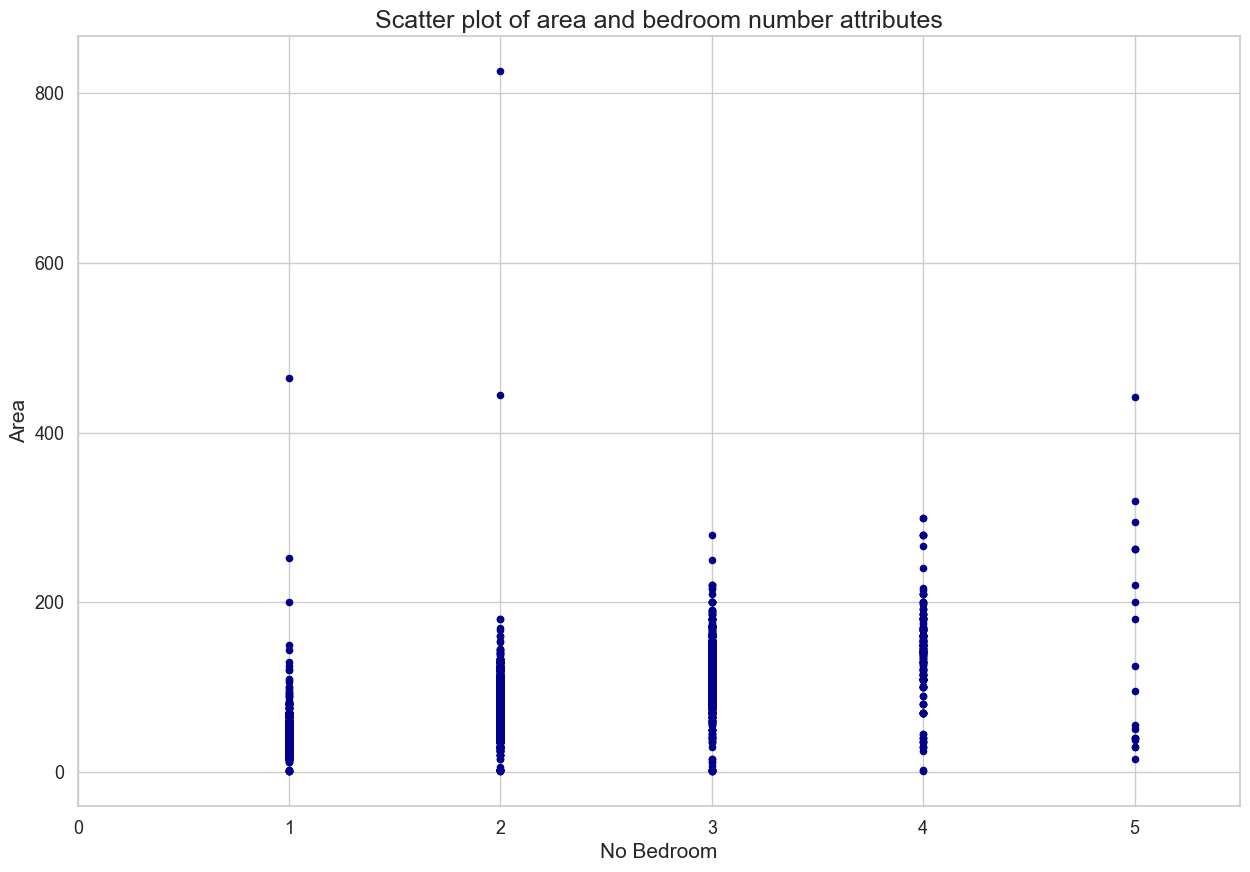

In [32]:
df.plot.scatter(x='No_Bedroom', y='Area', c='DarkBlue', figsize=(15, 10))
plt.title('Scatter plot of area and bedroom number attributes', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 5.5)
plt.xlabel('No Bedroom', fontsize=15)
plt.ylabel('Area', fontsize=15)
plt.show()

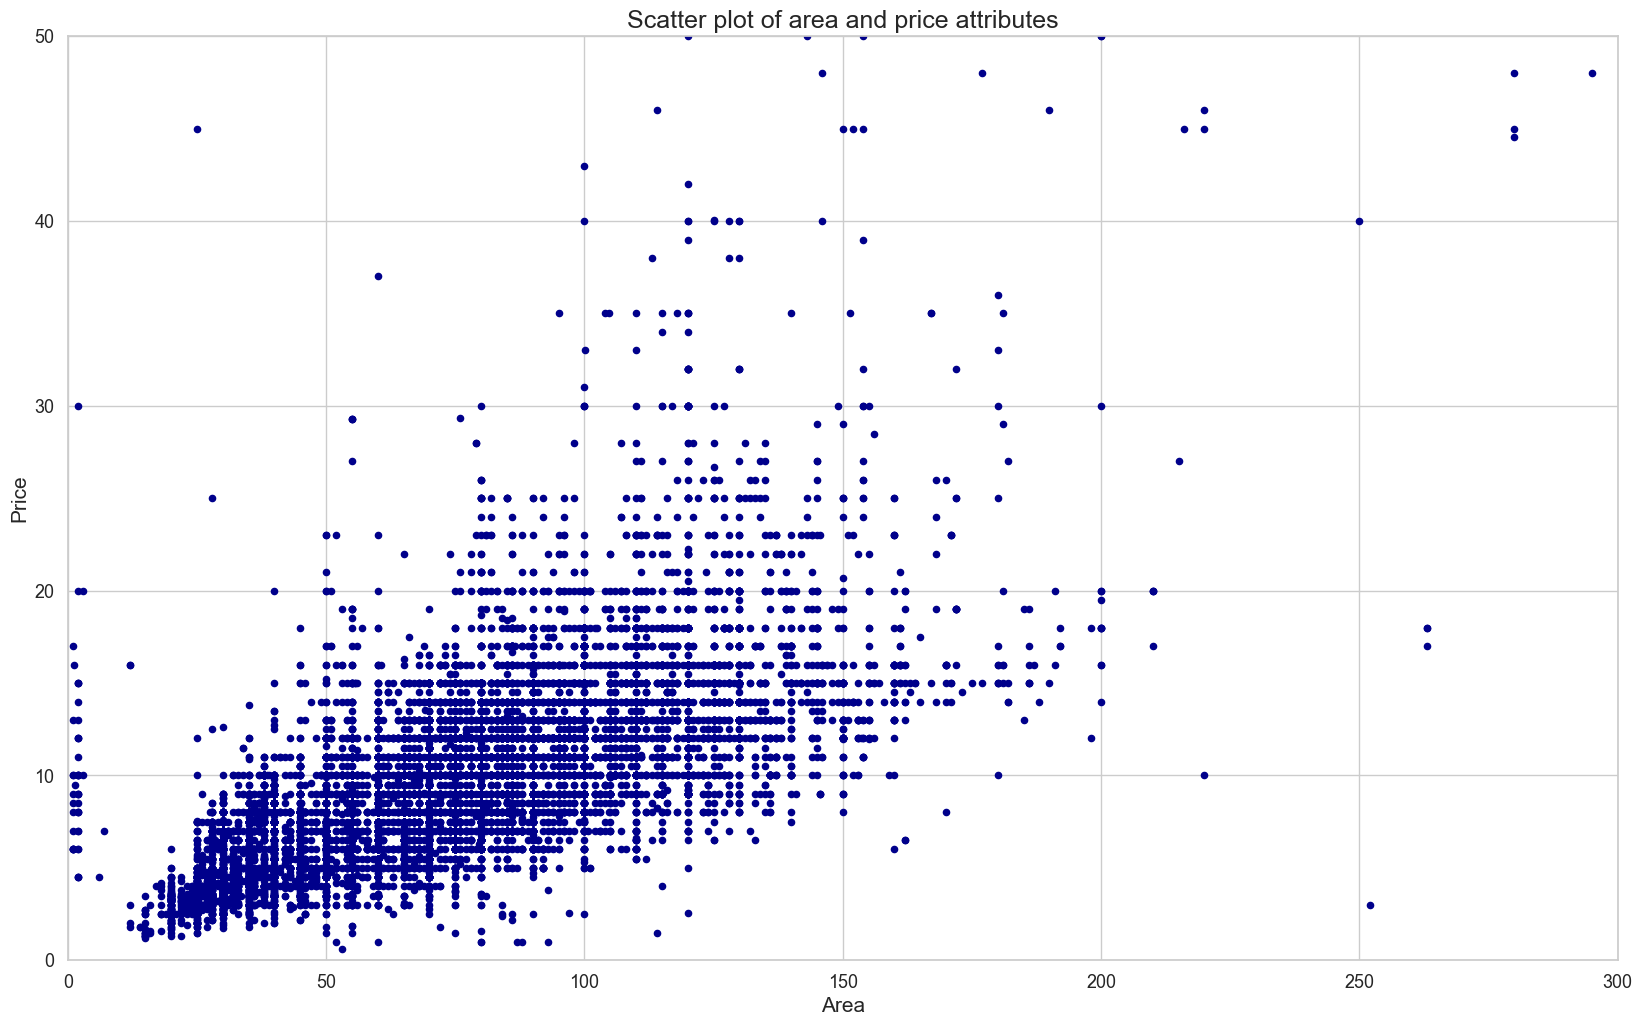

In [34]:
df.plot.scatter(x='Area', y='Price', c='DarkBlue', figsize=(20, 12))
plt.title('Scatter plot of area and price attributes', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 300)
plt.ylim(0, 50)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

### Correlation and describe

In [34]:
df['No_Bedroom'] = df['No_Bedroom'].astype("float")
df['No_Bathroom'] = df['No_Bathroom'].astype("float")

In [35]:
df.drop(columns=['Investor'], inplace=True)

In [36]:
non_num_cols = [col for col in df.columns if df[col].dtype == 'O']
non_num_data = df[non_num_cols]

In [37]:
num_cols = list(set(df.columns) - set(non_num_cols))
num_cols

['No_Bathroom',
 'No_Livingroom',
 'Latitude',
 'Area',
 'No_Bedroom',
 'Longitude',
 'Floor',
 'Price']

In [38]:
df_num = df[num_cols]
df_num.describe()

,No_Bathroom,No_Livingroom,Latitude,Area,No_Bedroom,Longitude,Floor,Price
count,10843.000000,3945.000000,16328.000000,16900.000000,16764.000000,16328.000000,5596.000000,16724.000000
mean,1.551877,1.001014,21.007864,74.482237,12.182594,105.788384,12.477127,58.358730
std,0.563900,0.038991,0.449452,33.162276,62.000436,2.382765,28.512939,6226.249488
min,1.000000,1.000000,10.224782,1.000000,1.000000,-123.144252,1.000000,0.625000
25%,1.000000,1.000000,21.002553,50.000000,2.000000,105.785437,4.000000,6.500000
50%,2.000000,1.000000,21.017417,72.000000,2.000000,105.804033,10.000000,9.000000
75%,2.000000,1.000000,21.034394,93.000000,3.000000,105.824155,16.000000,12.000000
max,6.000000,3.000000,49.304258,826.000000,926.000000,109.157551,707.000000,805194.333333


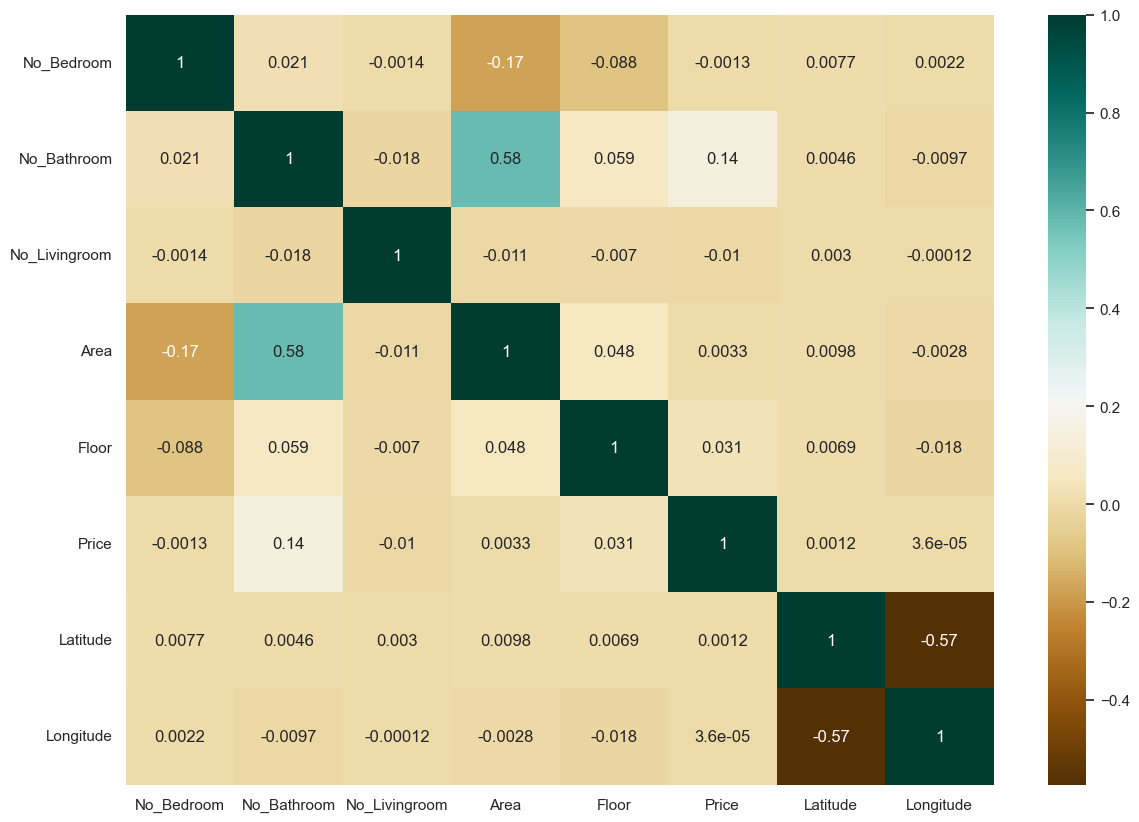

In [39]:
# correlation
plt.figure(figsize = (14,10))
g = sns.heatmap(df.corr(), cmap = 'BrBG', annot = True)

[(105.7, 106.0)]

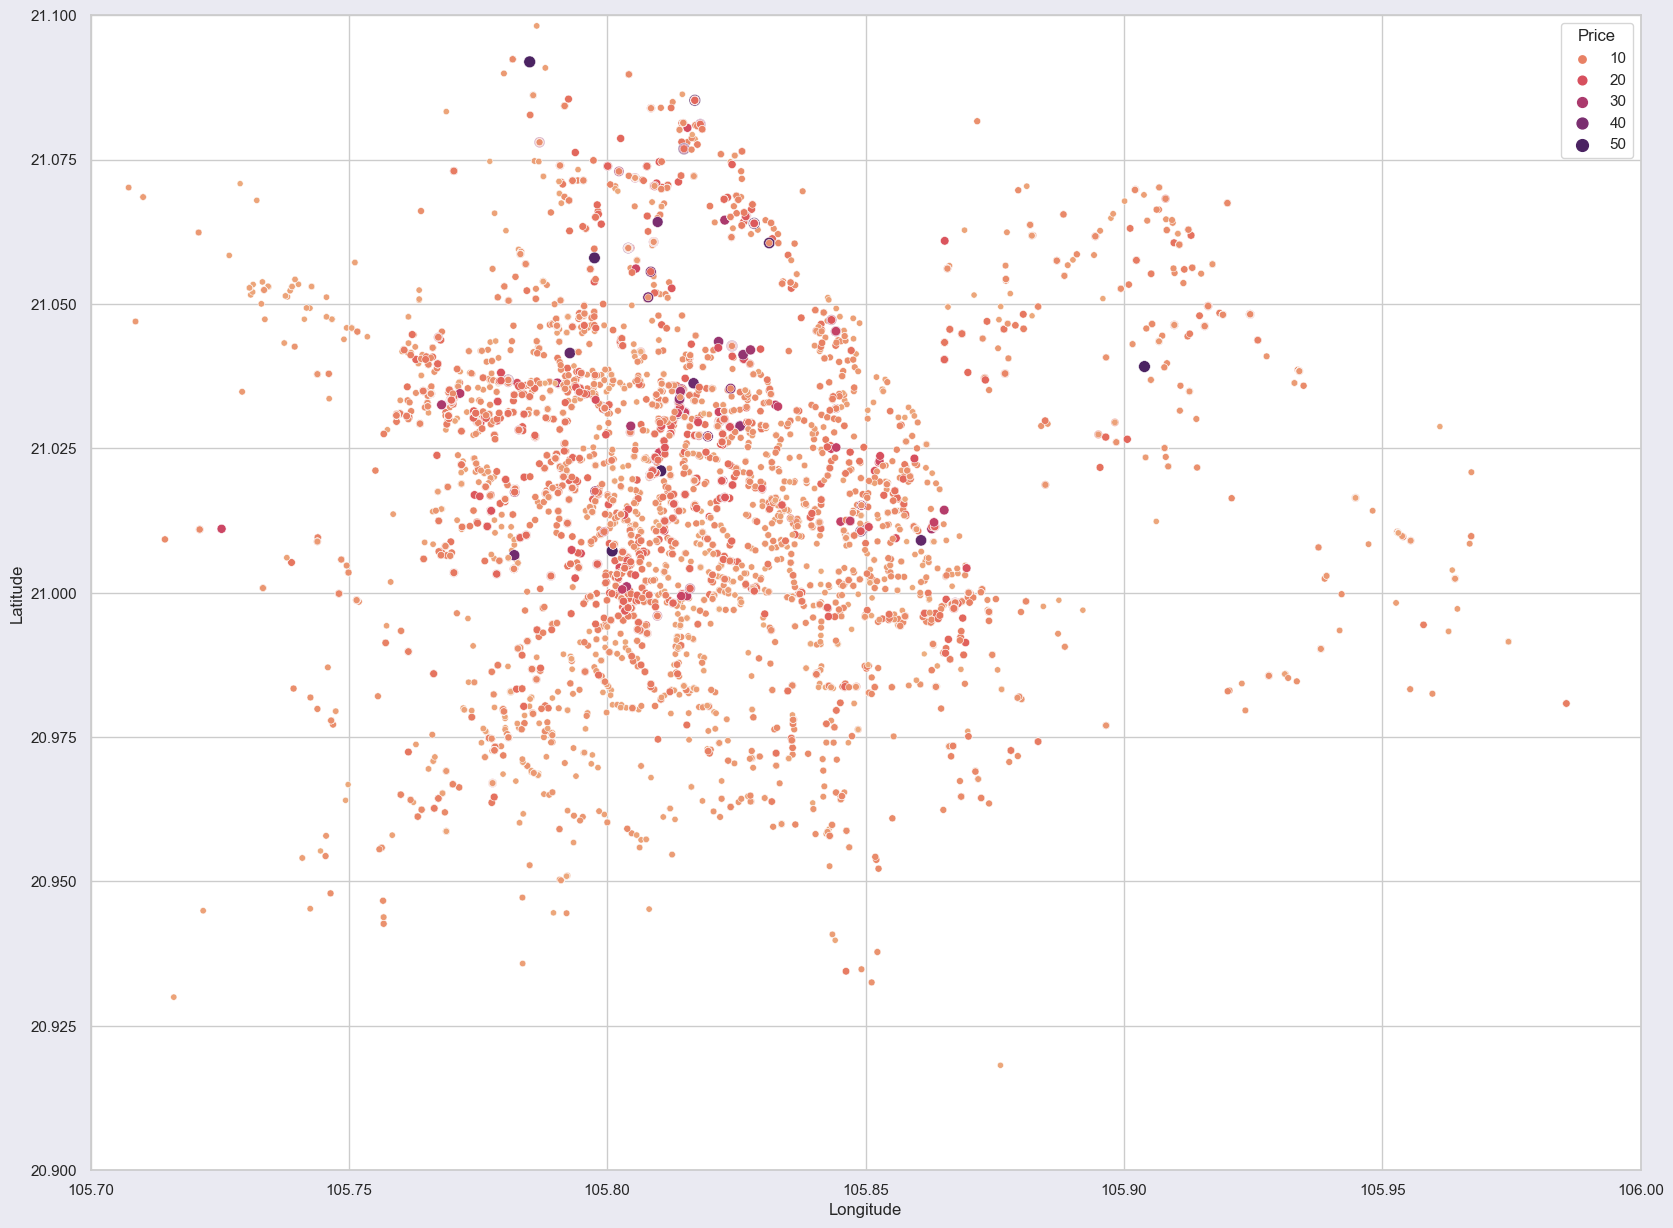

In [40]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 15), facecolor=facecolor)

# ax = sns.scatterplot(x=dropped_df['LATITUDE'], y=dropped_df['LONGITUDE'], hue=dropped_df['PRICE'], palette='winter')
ax = sns.scatterplot(data=df[df['Price'] <= 50], x='Longitude', y='Latitude', hue='Price', size='Price', palette='flare')
ax.set(ylim=(20.9,21.1))
ax.set(xlim=(105.7,106))

# Data cleaning

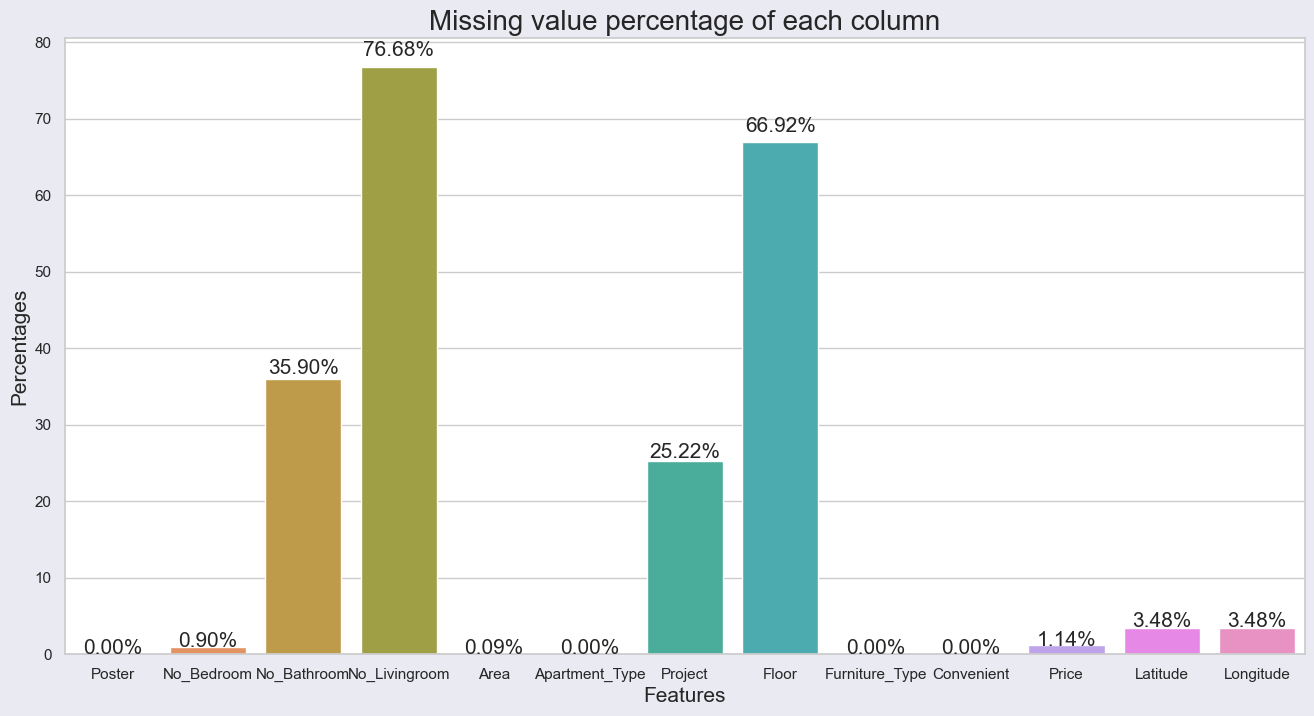

In [41]:
# visualize percentage of missing value after some preprocess steps
def missing_percent(df):
    nan_percent= 100 * (df.isnull().sum()/len(df))
    # nan_percent= nan_percent[nan_percent>0]
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

bar_x = []
bar_y = []
for x in list(nan_percent.items()):
  if x[0] not in ['Investor', 'Phone_Number', 'Raw_Description', 'Location', 'Furniture', 'Convinient', 'Entities', 'Url']:
    bar_x.append(x[0])
    bar_y.append(x[1])

sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
ax = sns.barplot(x=bar_x, y = bar_y)
ax.set_title('Missing value percentage of each column', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Percentages', fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center', fontsize=15)

In [42]:
# remove rows that have nan value in some columns such as: Area, No Bedroom, Price, Latitude, Longitude
df.dropna(axis=0, subset=['No_Bedroom', 'Area', 'Price', 'Latitude', 'Longitude'], inplace=True)

In [43]:
# remove outlier rows

# remove rows that have price > 50 million vietnamdong
df = df.loc[df['Price'] <= 50]

# remove rows that have no bedroom > 4
df = df[~df['No_Bedroom'].isnull()]
df = df.loc[df['No_Bedroom'] <= 4]

# remove rows that have Area not in range [15, 300]
df = df[~df['Area'].isnull()]
df = df.loc[df['Area'] <= 300]
df = df.loc[df['Area'] >= 15]

In [44]:
df.shape

(15382, 19)

# Feature engineering

In [45]:
# columns that have a large proportion of missing value will be dropped
# some unuseful columns also will be dropped

In [46]:
df = df.drop(
    columns=['Phone_Number', 'Project', 'Floor', 'Raw_Description', 'Location', 'Url', 'Entities', 'Convenient', 'Furniture', 'No_Livingroom', 'No_Bathroom'])

In [47]:
df.head()

,Poster,No_Bedroom,Area,Apartment_Type,Furniture_Type,Price,Latitude,Longitude
0,môi giới,3.0,80.0,chung cư tập thể,unk,7.5,21.041731,105.809950
1,cá nhân,2.0,48.0,chung cư thường,unk,7.5,21.008615,105.834091
2,cá nhân,1.0,40.0,chung cư tập thể,unk,5.0,20.999548,105.860602
3,môi giới,1.0,30.0,chung cư studio,full,4.5,21.032594,105.808742
4,môi giới,1.0,30.0,chung cư thường,full,4.5,21.033861,105.809472


In [48]:
df.to_csv('data/cleaned_data.csv', index=False)

In [35]:
df = pd.read_csv('data/cleaned_data.csv')

## Label encoding

In [36]:
df['Poster'] = df['Poster'].map(lambda x: x.strip(), na_action='ignore')
df['Poster'] = df['Poster'].map({'môi giới': 0, 'cá nhân': 1})

In [37]:
df['Apartment_Type'] = df['Apartment_Type'].map({'chung cư tập thể': 0, 'chung cư thường': 1, 'chung cư studio': 2, 'chung cư mini': 3, 'chung cư cao cấp': 4})

In [38]:
df['Furniture_Type'] = df['Furniture_Type'].map({'unk': 0, 'full': 1, 'cơ bản': 2, 'full cao cấp': 3, 'nguyên bản': 4})

In [39]:
df.head()

,Poster,No_Bedroom,Area,Apartment_Type,Furniture_Type,Price,Latitude,Longitude
0,0,3.0,80.0,0,0,7.5,21.041731,105.809950
1,1,2.0,48.0,1,0,7.5,21.008615,105.834091
2,1,1.0,40.0,0,0,5.0,20.999548,105.860602
3,0,1.0,30.0,2,1,4.5,21.032594,105.808742
4,0,1.0,30.0,1,1,4.5,21.033861,105.809472


## Split train/val/test set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.1, random_state=42)

In [42]:
len(df_train), len(df_val), len(df_test)

(11074, 1231, 3077)

# Building model

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [44]:
y_train = df_train['Price']
X_train = df_train.drop(columns=['Price'], axis=1)

y_val = df_val['Price']
X_val = df_val.drop(columns=['Price'], axis=1)

## Baseline model: Decision Tree, Random Forest

In [59]:
decision_tree = DecisionTreeRegressor()

In [60]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
y_pred = decision_tree.predict(X_val)
print("Root MSE on the val set: {:.4f}".format(mean_squared_error(y_val, y_pred)**(1/2)))

Root MSE on the val set: 3.0623


In [64]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
print("Root MSE on the val set: {:.4f}".format(mean_squared_error(y_val, y_pred) ** (1 / 2)))

Root MSE on the val set: 2.3014


## Hyperparameters tuning

In [65]:
import numpy as np

n_estimators = np.arange(20, 150, step=10)
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(10, 100, step=10)) + [None]
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = np.arange(2, 10, step=2)
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [74]:
forest = RandomForestRegressor()

random_cv = RandomizedSearchCV(
    forest, param_grid, n_iter=80, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)

In [75]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/hanhpv.aic/.virtualenvs/final_project/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/hanhpv.aic/.virtualenvs/final_project/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/hanhpv.aic/.virtualenvs/final_project/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 4, 6, 8]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140])},
                   scoring='neg_mean_squared_error', verbose=1)

In [76]:
best_model = random_cv.best_estimator_

In [77]:
print(best_model)

RandomForestRegressor(max_depth=90, max_features='auto', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=140)


In [78]:
y_pred = best_model.predict(X_val)
print("Root MSE on the val set: {:.4f}".format(mean_squared_error(y_val, y_pred) ** (1 / 2)))

Root MSE on the val set: 2.2805


## Save best model

In [79]:
import joblib

joblib.dump(best_model, 'model/best_random_forest.joblib')

['model/best_random_forest.joblib']

# Evaluate on test set

In [45]:
y_test = df_test['Price']
X_test = df_test.drop(columns=['Price'], axis=1)

In [46]:
import joblib

model = joblib.load('model/best_random_forest.joblib')

In [47]:
y_pred = model.predict(X_test)
print("Root MSE on the test set: {:.4f}".format(mean_squared_error(y_test, y_pred) ** (1 / 2)))

Root MSE on the test set: 2.6557


# Visualize feature importance

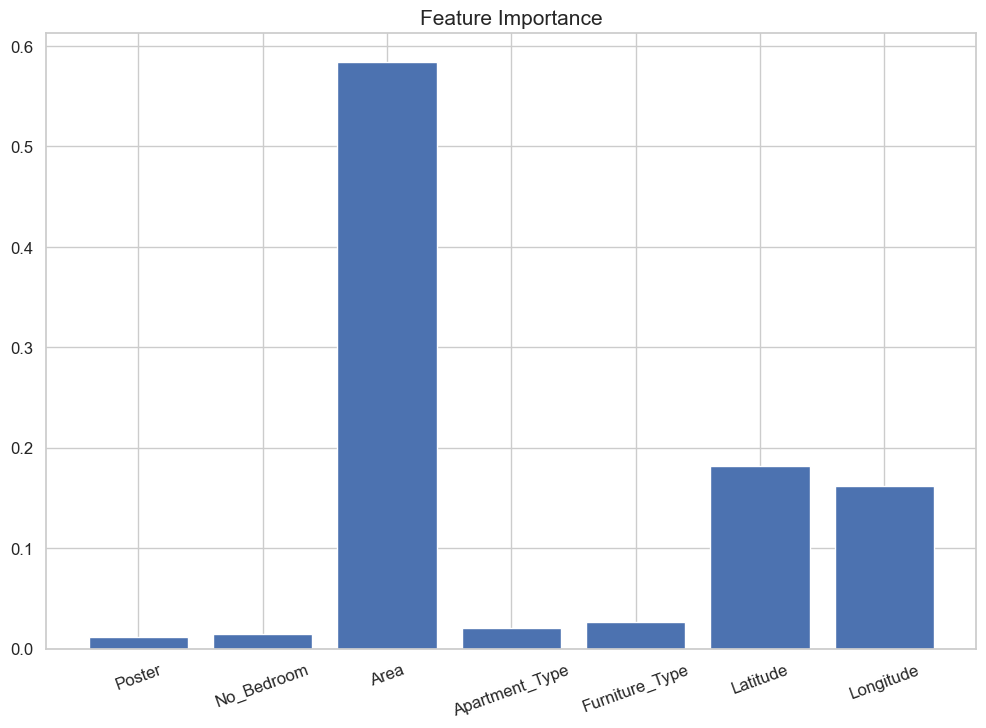

In [80]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = list(X_train.columns)


plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances)
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), features, rotation=20, fontsize = 12)
plt.yticks(fontsize=12)
# Create plot title
plt.title("Feature Importance", fontsize=15)
# Show plot
plt.show()